In [411]:
import pandas as pd 

df = pd.read_excel('employee.xlsx')

In [412]:
df

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,NaN
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
5,6,2451,Accountant,NaN,34.0,100000.0
6,7,1111,Accountant,Accounts,NaN,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,NaN
9,10,2156,Engineer,Production,45.0,89000.0


<Axes: ylabel='Salary'>

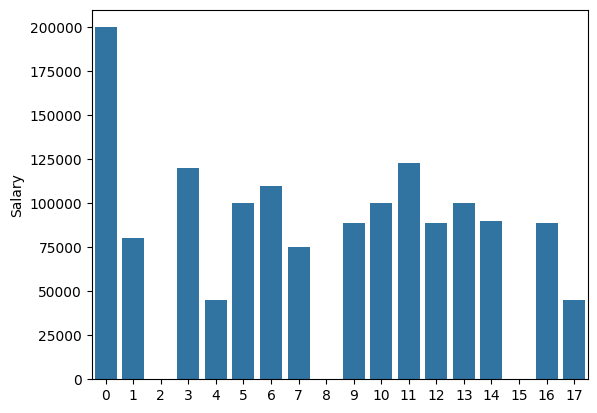

In [413]:
import seaborn as sns 

sns.barplot(df.Salary)

<Axes: ylabel='Age'>

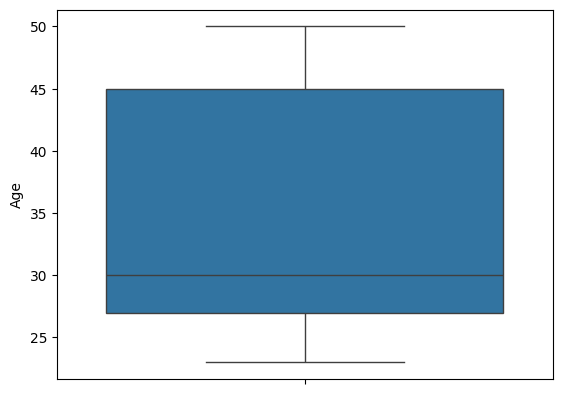

In [414]:
sns.boxplot(df.Age)

In [415]:
import numpy as np

def remove_outliers(s):
    q1 = np.percentile(s,25)
    q3 = np.percentile(s,75)


    iqr = q3 - q1

    lf = q1 - 1.5 * iqr
    uf = q3 + 1.5 * iqr

    return lf , uf

    

In [416]:
lf , uf = remove_outliers(df.Salary)

In [417]:
lf

np.float64(nan)

In [418]:
uf

np.float64(nan)

In [419]:
df.isna().sum()

Serial         0
Emp_ID         0
Designation    0
Department     2
Age            1
Salary         3
dtype: int64

In [420]:
df.fillna({'Department' : df.Department.mode()[0],
           'Age' :df.Age.mean(),
           'Salary' :df.Salary.median()
           
           
           }, inplace=True)

In [421]:
df.isna().sum()

Serial         0
Emp_ID         0
Designation    0
Department     0
Age            0
Salary         0
dtype: int64

In [444]:
lf,uf = remove_outliers(df.Salary)

In [445]:
lf

np.float64(72500.0)

In [446]:
uf

np.float64(116500.0)

In [454]:
df[(df.Salary < lf) | (df.Salary > uf)]

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
11,12,3214,Accountant,Account,49.0,123000.0
17,18,2123,Office Boy,Accounts,27.0,45000.0


<Axes: ylabel='Salary'>

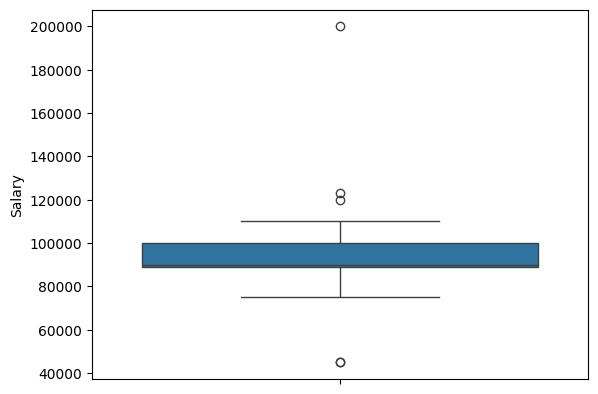

In [455]:
sns.boxplot(df.Salary)

In [427]:
df.Salary

0     200000.0
1      80000.0
2      90000.0
3     120000.0
4      45000.0
5     100000.0
6     110000.0
7      75000.0
8      90000.0
9      89000.0
10    100000.0
11    123000.0
12     89000.0
13    100000.0
14     90000.0
15     90000.0
16     89000.0
17     45000.0
Name: Salary, dtype: float64

In [428]:
df2 = df[(df.Salary >= lf) & (df.Salary <= uf)]

<Axes: ylabel='Salary'>

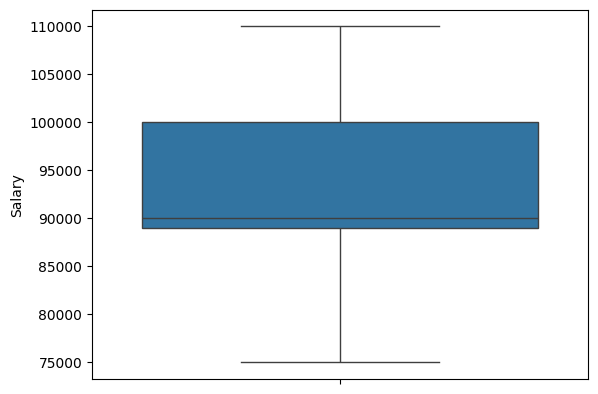

In [429]:
sns.boxplot(df2.Salary)

In [430]:
print(df.describe())


          Serial       Emp_ID        Age         Salary
count  18.000000    18.000000  18.000000      18.000000
mean    9.500000  1995.333333  34.294118   95833.333333
std     5.338539  1334.508369   9.429395   33036.966817
min     1.000000  1001.000000  23.000000   45000.000000
25%     5.250000  1108.000000  27.000000   89000.000000
50%     9.500000  1678.500000  30.500000   90000.000000
75%    13.750000  2156.000000  45.000000  100000.000000
max    18.000000  6543.000000  50.000000  200000.000000


In [431]:
print(df2.describe())

          Serial       Emp_ID        Age         Salary
count  13.000000    13.000000  13.000000      13.000000
mean   10.076923  2026.923077  32.253394   91692.307692
std     4.821161  1499.005307   8.028222    9086.479107
min     2.000000  1001.000000  23.000000   75000.000000
25%     7.000000  1111.000000  25.000000   89000.000000
50%    10.000000  1234.000000  30.000000   90000.000000
75%    14.000000  2156.000000  34.294118  100000.000000
max    17.000000  6543.000000  45.000000  110000.000000


<Axes: xlabel='Designation', ylabel='Salary'>

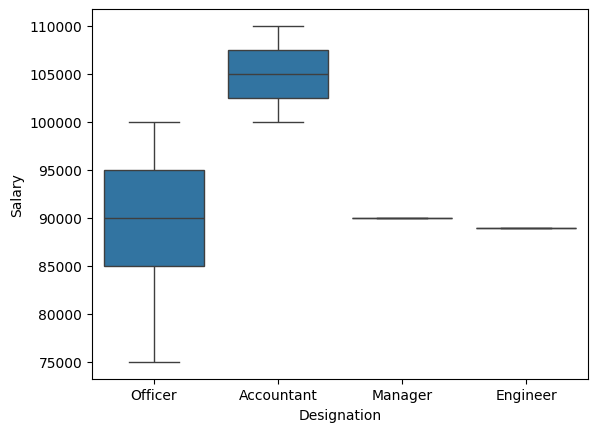

In [432]:
sns.boxplot(data=df2, x='Designation', y='Salary')

In [433]:
df2

,Serial,Emp_ID,Designation,Department,Age,Salary
1,2,1107,Officer,IT,30.000000,80000.0
2,3,1203,Officer,HR,28.000000,90000.0
5,6,2451,Accountant,IT,34.000000,100000.0
6,7,1111,Accountant,Accounts,34.294118,110000.0
7,8,1001,Officer,IT,25.000000,75000.0
8,9,1234,Manager,IT,23.000000,90000.0
9,10,2156,Engineer,Production,45.000000,89000.0
10,11,6543,Officer,Production,29.000000,100000.0
12,13,2156,Engineer,Production,45.000000,89000.0
13,14,1098,Officer,IT,25.000000,100000.0


<Axes: xlabel='Department', ylabel='Salary'>

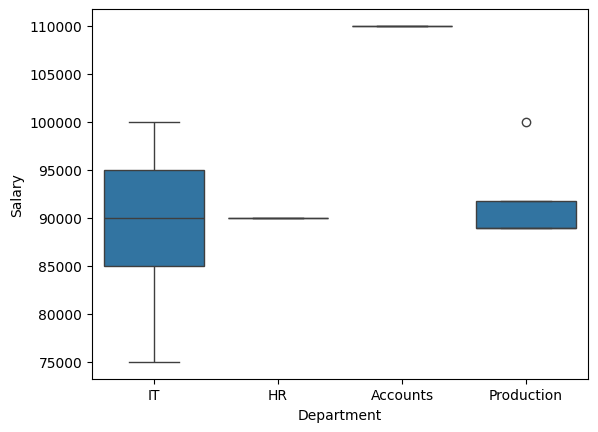

In [434]:
sns.boxplot(data=df2, x='Department', y='Salary')

In [435]:
df2[(df2.Department == 'IT') & (df2.Age >= 30)]

,Serial,Emp_ID,Designation,Department,Age,Salary
1,2,1107,Officer,IT,30.0,80000.0
5,6,2451,Accountant,IT,34.0,100000.0
14,15,2912,Officer,IT,31.0,90000.0


In [436]:
df2[df2.Age >= 40]['Age'].count()

np.int64(3)

In [437]:
df2[df2.Designation!='Engineer']['Designation'].count()

np.int64(10)

In [438]:
df2[(df2.Department=='IT') | (df2.Department=='HR')]

,Serial,Emp_ID,Designation,Department,Age,Salary
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,90000.0
5,6,2451,Accountant,IT,34.0,100000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,90000.0
13,14,1098,Officer,IT,25.0,100000.0
14,15,2912,Officer,IT,31.0,90000.0
15,16,1222,Officer,IT,25.0,90000.0


In [439]:
df2.sort_values(by='Salary' ,ascending=False).head(6)

,Serial,Emp_ID,Designation,Department,Age,Salary
6,7,1111,Accountant,Accounts,34.294118,110000.0
5,6,2451,Accountant,IT,34.000000,100000.0
10,11,6543,Officer,Production,29.000000,100000.0
13,14,1098,Officer,IT,25.000000,100000.0
2,3,1203,Officer,HR,28.000000,90000.0
8,9,1234,Manager,IT,23.000000,90000.0


In [440]:
df2.groupby('Department')['Salary'].mean()

Department
Accounts      110000.000000
HR             90000.000000
IT             89285.714286
Production     91750.000000
Name: Salary, dtype: float64

In [441]:
df2.groupby('Designation')['Salary'].mean()

Designation
Accountant    105000.000000
Engineer       89000.000000
Manager        90000.000000
Officer        89285.714286
Name: Salary, dtype: float64